In [43]:
# 신규고객 유입경로(첫구매가 6개월 이내)
# 유입경로에 따른 판매량/ 매출액
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
os.environ["PATH"] +=os.pathsep + "~/anaconda3/include/graphviz$"
os.chdir(r"/home/piai/Big Data 분석")   
matplotlib.rc('font',family='NanumGothic')
matplotlib.rc('axes',unicode_minus=False)

In [6]:
df_s = pd.read_csv('Sales_data_RMF.csv')
df_m = pd.read_csv('Member_data_Allsum.csv', encoding = 'utf-8')

/tmp/ipykernel_27568/3811966767.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv('Sales_data_RMF.csv')
/tmp/ipykernel_27568/3811966767.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_m = pd.read_csv('Member_data_Allsum.csv', encoding = 'utf-8')


In [7]:
df_s

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,포인트,배송준비시간,배송시간,물품중분류,물품소분류
0,901011864201303,2021-01-05,2021-01-01,2020-12-31,35,201901010750089,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형),30735,1 days,4 days,기저귀,팬티형
1,901011864430366,2021-01-03,2021-01-01,2020-12-31,9,201901010750143,74560,43825,팬티,하기스 매직핏팬티 3단계 남아 184매(팬티형),30735,1 days,2 days,기저귀,팬티형
2,81231186197954,2021-01-05,2021-01-01,2020-12-31,22,201812310749820,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형),17151,1 days,4 days,기저귀,팬티형
3,812311863500220,2021-01-03,2021-01-01,2020-12-31,8,201812310750007,52160,32408,팬티,하기스 보송보송팬티 4단계 공용 124매(팬티형),19752,1 days,2 days,기저귀,팬티형
4,812311863220192,2021-01-03,2021-01-01,2020-12-31,23,201812310749977,47360,30066,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),17294,1 days,2 days,기저귀,팬티형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,00806233401-26770461124511,2022-08-11,2022-08-08,2022-08-07,13,201906180918504,21300,14910,FC,라네이처 시그니처 울트라슬림 날개 중형 12개입 (EA),6390,1 days,3 days,생리대,생리대
199995,00806204436-0461904922687,2022-08-11,2022-08-08,2022-08-07,163,201901280776735,7900,5840,FC,라네이처 시그니처 맥시슬림 날개 중형 12개입 (EA),2060,1 days,3 days,생리대,생리대
199996,00806204436-0461904922688,2022-08-12,2022-08-08,2022-08-07,163,201901280776735,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 대형 10개입 (EA),1860,1 days,4 days,생리대,생리대
199997,00806215930-05281256126202,2022-08-10,2022-08-08,2022-08-07,5,201906200921415,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 소형 14개입 (EA),1860,1 days,2 days,생리대,생리대


In [9]:
# 첫구매
first_data = pd.DataFrame()
first_data['고객번호'] = df_s['고객번호'].unique()
# 고객번호별로 구매날짜 최댓값 구하기
first_count = df_s.groupby('고객번호')['구매일'].min()
# dm DataFrame과 '고객번호'를 기준으로 merge
first_data= pd.merge(first_data, first_count, on='고객번호', how='left')
first_data.rename(columns = {'구매일' : '첫구매일'}, inplace = True)
first_data

,고객번호,첫구매일
0,201901010750089,2020-12-31
1,201901010750143,2020-12-31
2,201812310749820,2020-12-31
3,201812310750007,2020-12-31
4,201812310749977,2020-12-31
...,...,...
97742,201911181032894,2022-08-07
97743,201912171047083,2022-08-07
97744,201901280778029,2022-08-07
97745,201910221016307,2022-08-07


In [12]:
# 신규 고객 (첫구매일 6개월 이내 : 2022/02/07 이후부터)
new_df = first_data.loc[first_data['첫구매일'] >= '2022-02-07']
new_df

,고객번호,첫구매일
83311,201906140914955,2022-02-07
83312,201908070956236,2022-02-07
83313,201905310906866,2022-02-07
83314,201901100757233,2022-02-07
83315,201903240850034,2022-02-07
...,...,...
97742,201911181032894,2022-08-07
97743,201912171047083,2022-08-07
97744,201901280778029,2022-08-07
97745,201910221016307,2022-08-07


In [15]:
#member 데이터에서 신규 고객만 추출
merged_df = pd.merge(df_m, new_df, on='고객번호', how='inner')
merged_df

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매일로부터기간,고객분류,총구매횟수,총결제금액,총사용포인트,첫구매일
0,201910070999934,여,기혼,충북,33.0,국민은행,인스타그램,Yes,166,재구매가능성 고객,1.0,89198.0,15442.0,2022-02-23
1,201910070999954,여,기혼,서울,26.0,국민카드,인스타그램,Yes,49,현재고객,2.0,14321.0,1899.0,2022-05-28
2,201910070999975,여,기혼,전북,29.0,신한은행,인스타그램,No,34,현재고객,4.0,109632.0,27388.0,2022-02-23
3,201910071000041,여,기혼,제주,32.0,국민은행,인스타그램,Yes,2,현재고객,1.0,5920.0,5950.0,2022-08-06
4,201910071000066,여,미혼,전북,34.0,롯데카드,검색광고,No,119,재구매가능성 고객,1.0,3484.0,2016.0,2022-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,20200724113017315991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,현재고객,1.0,9240.0,2460.0,2022-07-24
3662,20200729134409126553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,현재고객,1.0,3000.0,0.0,2022-07-29
3663,20200803075905757887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,현재고객,1.0,5841.0,59.0,2022-08-03
3664,20200805170229147688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,현재고객,1.0,3000.0,0.0,2022-08-06


In [57]:
#신규고객 유입경로 분포 > SNS, 온라인 커뮤니티 등 카테고리 또 나눠서 보자
new_path = merged_df.groupby('유입경로').size()
new_path

유입경로
검색광고       387
네이버블로그     960
네이버카페      258
매장쿠폰        18
오픈마켓        91
이마트          7
인스타그램     1362
지인추천       365
직접검색        52
페이스북        50
dtype: int64

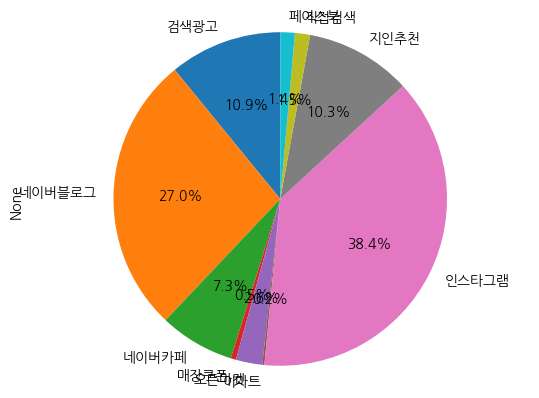

In [58]:
new_path.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [64]:
#신규고객 유입경로 총 결제금액
path_sum = merged_df.groupby('유입경로')['총결제금액'].sum()
path_sumㅇㅇ

유입경로
검색광고      18318329.0
네이버블로그    51584481.0
네이버카페     13862739.0
매장쿠폰        489757.0
오픈마켓       4802262.0
이마트         243312.0
인스타그램     64899539.0
지인추천      21231190.0
직접검색       2195732.0
페이스북       2507635.0
Name: 총결제금액, dtype: float64

<BarContainer object of 10 artists>

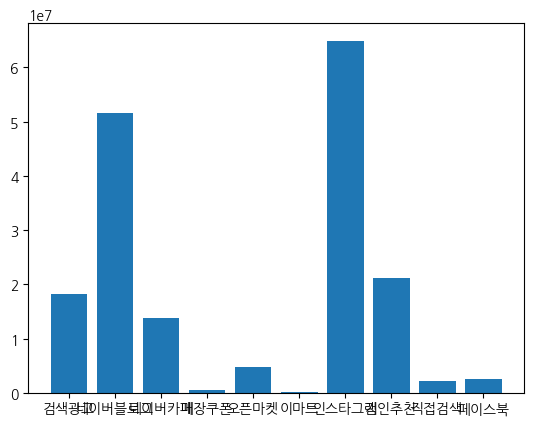

In [60]:
x = path_sum.index
y = path_sum.values
plt.bar(x, y)

In [65]:
#신규 고객 유입경로에 따른 총 구매횟수
path_num = merged_df.groupby('유입경로')['총구매횟수'].sum()
path_num

유입경로
검색광고       752.0
네이버블로그    2006.0
네이버카페      526.0
매장쿠폰        23.0
오픈마켓       185.0
이마트         15.0
인스타그램     2597.0
지인추천       778.0
직접검색        94.0
페이스북        90.0
Name: 총구매횟수, dtype: float64

<BarContainer object of 10 artists>

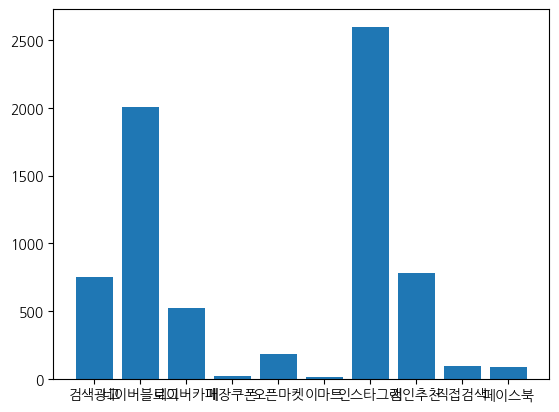

In [66]:
a = path_num.index
b = path_num.values
plt.bar(a,b)

In [68]:
#유입경로별 이탈률(기준 2021년 8월 7알, 1년) 확인
df_m

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매일로부터기간,고객분류,총구매횟수,총결제금액,총사용포인트
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,460,이탈고객,1.0,16314.0,9486.0
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,527,이탈고객,1.0,3800.0,1810.0
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,453,이탈고객,2.0,95844.0,23196.0
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,376,이탈고객,2.0,116532.0,35388.0
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,556,이탈고객,1.0,19900.0,8020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81355,20200724113017315991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,현재고객,1.0,9240.0,2460.0
81356,20200729134409126553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,현재고객,1.0,3000.0,0.0
81357,20200803075905757887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,현재고객,1.0,5841.0,59.0
81358,20200805170229147688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,현재고객,1.0,3000.0,0.0


In [70]:
df_etal = df_m[df_m['고객분류'] == '이탈고객']

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,구매일로부터기간,고객분류,총구매횟수,총결제금액,총사용포인트
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,460,이탈고객,1.0,16314.0,9486.0
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,527,이탈고객,1.0,3800.0,1810.0
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,453,이탈고객,2.0,95844.0,23196.0
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,376,이탈고객,2.0,116532.0,35388.0
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,556,이탈고객,1.0,19900.0,8020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54817,201908080957311,여,기혼,경남,34.0,국민은행,네이버블로그,Yes,366,이탈고객,1.0,3000.0,0.0
54822,201908080957335,여,기혼,대구,32.0,롯데카드,검색광고,Yes,366,이탈고객,1.0,89198.0,15442.0
54830,201908080957388,여,기혼,경기,34.0,신한은행,네이버카페,Yes,366,이탈고객,1.0,28214.0,1786.0
54832,201908080957390,여,기혼,인천,34.0,우리은행,네이버블로그,Yes,366,이탈고객,1.0,3000.0,0.0


In [95]:
df_etal_uip = df_etal.groupby('유입경로')['고객번호'].count() #유입경로별 이탈고객 
df_jaehee1 = pd.DataFrame(df_etal_uip)

In [96]:
df_jaehee2 = pd.DataFrame(df_m['유입경로'].value_counts())

In [102]:
df_jaehee1

,고객번호
유입경로,
검색광고,3092
네이버블로그,8544
네이버카페,2122
매장쿠폰,167
오픈마켓,741
이마트,79
인스타그램,11629
지인추천,2995
직접검색,427


In [99]:
df_jaehee2

,유입경로
인스타그램,31167
네이버블로그,22684
검색광고,8259
지인추천,8021
네이버카페,5725
오픈마켓,2022
페이스북,1405
직접검색,1137
매장쿠폰,456
이마트,218


In [106]:
df_jaehee3 = df_jaehee1.merge(df_jaehee2, left_index = True, right_index = True)

In [110]:
df_jaehee3['비율'] = df_jaehee3['고객번호'] / df_jaehee3['유입경로']    #유입경로 비율

In [109]:
df_jaehee3

,고객번호,유입경로,비율
검색광고,3092,8259,0.374379
네이버블로그,8544,22684,0.376653
네이버카페,2122,5725,0.370655
매장쿠폰,167,456,0.366228
오픈마켓,741,2022,0.366469
이마트,79,218,0.362385
인스타그램,11629,31167,0.373119
지인추천,2995,8021,0.373395
직접검색,427,1137,0.375550
페이스북,545,1405,0.387900


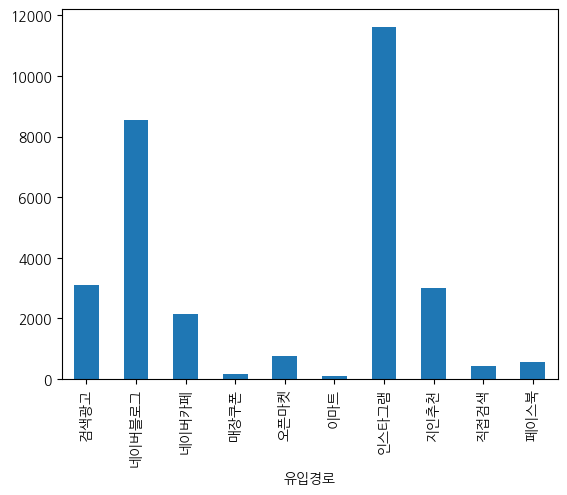

In [92]:
df_etal_uip.plot(kind= 'bar')
plt.show()

In [79]:
# df_etal_uip = pd.DataFrame()
# df_etal_uip['유입경로'] = df_etal['유입경로'].unique()
# df_etal_uip['수'] = df_etal.groupby('유입경로')['고객번호'].count()
# df_etal_uip.columns

Index(['유입경로', '수'], dtype='object')

In [111]:
#유입경로별 성별, 연령 분포 확별
